# Statistical Data Analysis Project

## Project Description

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan is more profitable.

## Table of Contents:

1. [Open the data file and study the general information](#part1) <br>
2. Prepare the data: <br>
    2.1 [Find and eliminate errors, convert data types](#part2_1) <br>
    2.2 [For each user find monthly usage of services](#part2_2) <br>
    2.3 [Calculate monthly revenue for each user](#part2_3) <br>
3. Analyze the data: <br>
    3.1 [Customer behavior in general](#part3_1) <br>
    3.2 [Differences in customer behavior of Surf/Ultimate plan users](#part3_2) <br>
4. Test the hypotheses: <br>
    4.1 [The average revenue from users of Ultimate and Surf calling plans differs](#part4_1) <br>
    4.2 [The average revenue from users in NY-NJ area is different from that of the users from other regions](#part4_2) <br>
5. [Overall conclusion](#part5)

<a id="part1"></a>
### Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from functools import reduce
import math

In [2]:
data_users = pd.read_csv('/datasets/megaline_users.csv')
display(data_users.head())
print(data_users.info())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [3]:
data_plans = pd.read_csv('/datasets/megaline_plans.csv')
display(data_plans.head())
print(data_plans.info())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
data_calls = pd.read_csv('/datasets/megaline_calls.csv')
display(data_calls.head())
print(data_calls.info())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [5]:
data_messages = pd.read_csv('/datasets/megaline_messages.csv')
display(data_messages.head())
print(data_messages.info())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [6]:
data_internet = pd.read_csv('/datasets/megaline_internet.csv')
display(data_internet.head())
print(data_internet.info())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


Everything seems pretty fine, we will change data types for dates in all columns and check every table for errors

### Prepare the data

<a id="part2_1"></a>
#### Find and eliminate errors, convert data types

In [7]:
#extracting churn month
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d') 
data_users['churn_month'] = data_users.churn_date.dt.month
data_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_month
480,1480,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,surf,NaT,NaN
369,1369,Bernard,Mckee,69,"Milwaukee-Waukesha, WI MSA",2018-10-06,surf,NaT,NaN
432,1432,Azucena,Goodwin,59,"Salt Lake City, UT MSA",2018-10-03,ultimate,NaT,NaN
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaT,NaN
314,1314,Brice,Morgan,35,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-03-06,ultimate,NaT,NaN


In [11]:
#extracting calls month for grouping
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['month'] = data_calls.call_date.dt.month
data_calls.head() 

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [12]:
#rounding up calls duration
data_calls['duration'] = np.ceil(data_calls['duration'])
#checking calls duration distribution
data_calls['duration'].describe()

count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [10]:
#extracting messages month for grouping
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['month'] = data_messages.message_date.dt.month
data_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [9]:
#extracting internet session month for grouping
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet.session_date.dt.month
data_internet.head() 

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [17]:
#rounding up internet session sizes
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil)
#checking internet session size distribution
data_internet['mb_used'].describe()

count    104825.000000
mean        367.142876
std         277.256974
min           0.000000
25%         137.000000
50%         344.000000
75%         555.000000
max        1694.000000
Name: mb_used, dtype: float64

We change data type for all columns with dates in all tables. Since we're looking for monthly profit, we will make new columns with month (year is not relevant, according to description, all the data is from 2018).

We rounded every call duration up to one minute (getting rid of seconds), and we rounded every internet session up to 1 mb.

Next we will group every dataframe according to user id and month.

<a id="part2_2"></a>
#### For each user find monthly usage of services

In [16]:
#aggregating monthly calls for each user
calls_monthly = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls_monthly.columns = ['user_id', 'month', 'calls', 'duration']

calls_monthly.sample(5)

,user_id,month,calls,duration
2006,1439,8,53,327.51
1999,1438,9,13,68.10
1114,1244,11,17,143.78
71,1019,12,59,441.98
929,1198,11,54,425.61


In [17]:
#aggregating monthly messages for each user
messages_monthly = data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_monthly.columns = ['user_id', 'month', 'messages']
messages_monthly.sample(5)

,user_id,month,messages
1658,1455,11,68
128,1045,11,49
1008,1263,5,5
1235,1334,9,15
839,1223,9,27


In [18]:
##aggregating monthly internet sessions for each user
internet_monthly = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_monthly.sample(5)

,user_id,month,mb_used
1268,1267,11,1468.13
15,1004,10,14541.63
1453,1317,12,16207.01
960,1199,12,12496.09
574,1122,9,22436.68


We got tables grouped for each user and each month. We merge it together in one table with monthly usage of services for each user. Firstly we merge tables with services usage, then we add some information from data_users dataframe. I'm sure there's a way to add only specified columns, would love to know the solution.

There are missing values, since not every user uses all of the services every month, so we will replace NaN with 0, and it won't affect our calculations.

In [21]:
#merging dataframes together
dfs = [calls_monthly, messages_monthly, internet_monthly]
data_monthly = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'],
                                                 how='outer'), dfs)
data_monthly = data_monthly.merge(data_users, on='user_id')
data_monthly = data_monthly.drop(['first_name', 'last_name', 'age', 'reg_date', 'churn_date'], axis=1)
data_monthly = data_monthly.fillna(value=0) #Here it's really zero, no registered usage of service at all

data_monthly.sample(10)

,user_id,month,calls,duration,messages,mb_used,city,plan,churn_month
1314,1288,11,45.0,273.11,0.0,11979.03,"Las Vegas-Henderson-Paradise, NV MSA",surf,0.0
300,1066,4,57.0,438.04,32.0,22187.52,"Boston-Cambridge-Newton, MA-NH MSA",surf,0.0
9,1003,12,149.0,1041.00,50.0,27044.14,"Tulsa, OK MSA",surf,0.0
966,1206,12,47.0,334.28,33.0,27945.75,"Providence-Warwick, RI-MA MSA",surf,0.0
464,1099,10,72.0,486.99,24.0,20462.74,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,0.0
664,1144,8,70.0,540.45,86.0,36704.71,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,0.0
2070,1456,6,65.0,383.42,33.0,12266.66,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",ultimate,0.0
1799,1393,12,126.0,843.13,32.0,14164.82,"Knoxville, TN MSA",surf,0.0
127,1036,6,19.0,152.25,19.0,1449.37,"Denver-Aurora-Lakewood, CO MSA",ultimate,0.0
1956,1425,12,39.0,233.30,28.0,18001.22,"Las Vegas-Henderson-Paradise, NV MSA",surf,0.0


In [24]:
#dropping the rows where churn month is less than month, we should not charge someone after they quit
data_monthly = data_monthly.drop(data_monthly[(data_monthly.churn_month != 0) & (data_monthly.month > data_monthly.churn_month)].index)
data_monthly.query('churn_month != 0')

,user_id,month,calls,duration,messages,mb_used,city,plan,churn_month
19,1006,11,2.0,9.32,15.0,2068.37,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,12.0
20,1006,12,9.0,54.79,139.0,32118.82,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,12.0
53,1012,11,10.0,71.42,0.0,13935.03,"Chicago-Naperville-Elgin, IL-IN-WI MSA",surf,11.0
75,1022,5,39.0,287.34,0.0,4908.08,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,9.0
76,1022,6,76.0,455.45,0.0,23436.48,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,9.0
...,...,...,...,...,...,...,...,...,...
2215,1491,5,48.0,409.06,45.0,6464.49,"Grand Rapids-Kentwood, MI MSA",surf,9.0
2216,1491,6,64.0,373.47,54.0,11034.31,"Grand Rapids-Kentwood, MI MSA",surf,9.0
2217,1491,7,60.0,437.33,64.0,7833.29,"Grand Rapids-Kentwood, MI MSA",surf,9.0
2218,1491,8,54.0,362.10,50.0,10245.84,"Grand Rapids-Kentwood, MI MSA",surf,9.0


In [25]:
data_plans #just to have it close

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<a id="part2_3"></a>
#### Calculate monthly revenue for each user

In [33]:
#i did it with function using values from external dataframe, since I didn't want to merge everything in one huge df
def calculate_profit(row):
    tariff = row['plan']
    calls = row['duration']
    messages = row['messages']
    internet = row['mb_used']
    if tariff == 'surf':
        plan = data_plans.iloc[0, :]
    else:
        plan = data_plans.iloc[1, :]
    charge = plan['usd_monthly_pay']   
    
    if calls > plan['minutes_included']:
        charge += (calls - plan['minutes_included']) * plan['usd_per_minute']
    if messages > plan['messages_included']:
        charge += (messages - plan['messages_included']) * plan['usd_per_message']
    if internet > plan['mb_per_month_included']:
        charge += math.ceil((internet - plan['mb_per_month_included']) / 1024) * plan['usd_per_gb']
    return charge
    
data_monthly['profit'] = data_monthly.apply(calculate_profit, axis=1)
data_monthly.head(5)

,user_id,month,calls,duration,messages,mb_used,city,plan,churn_month,profit
0,1000,12,16.0,116.83,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,0.0,70.00
1,1001,8,27.0,171.14,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,0.0,20.00
2,1001,9,49.0,297.69,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,0.0,20.00
3,1001,10,65.0,374.11,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,0.0,90.09
4,1001,11,64.0,404.59,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,0.0,60.00


Now that we have our merged table with all the information needed (minutes, texts and volume of data the users of each plan require per month), we added profit for each user and can move on to studying customers' behavior.

### Analyze the data

<a id="part3_1"></a>
#### Customer behavior in general

count    2256.000000
mean      405.160448
std       224.023259
min         0.000000
25%       248.630000
50%       400.225000
75%       540.467500
max      1431.220000
Name: duration, dtype: float64

The mean for calls: 405.1604476950355
The median for calls: 400.22500000000014
The variance for calls: 50164.174749134676
The standard deviation for calls: 223.97360279536218


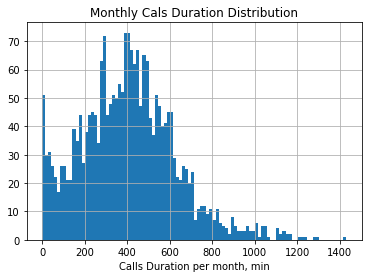

In [35]:
#print out general info for calls duration
print(data_monthly['duration'].describe())
print()
print('The mean for calls:', data_monthly['duration'].mean())
print('The median for calls:', data_monthly['duration'].median())
print('The variance for calls:', np.var(data_monthly['duration']))
print('The standard deviation for calls:', np.std(data_monthly['duration']))
data_monthly['duration'].hist(bins=100)
plt.title("Monthly Cals Duration Distribution")
plt.xlabel("Calls Duration per month, min")
plt.show()

As for the calls duration, we see that on average people use about 429 minutes a month. Dataset is skewed to the left and there's a significant drop after 600 minutes, which means there's more people that use less than 200 minutes, than there are people who use more than 600. Almost no one uses more than 1000 minutes per month. The biggest usage is only 1432 minutes, which means that according to this sample ultimate tariff users won't exceed their limit for calls and most of surf tariff users also.

count    2256.000000
mean       33.210106
std        34.173383
min         0.000000
25%         3.000000
50%        26.000000
75%        51.000000
max       266.000000
Name: messages, dtype: float64

The mean for messages: 33.21010638297872
The median for messages: 26.0
The variance for messages: 1167.302486513505
The standard deviation for messages: 34.16580873495467


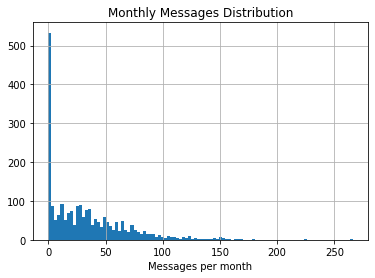

In [36]:
#print out general info for messages
print(data_monthly['messages'].describe())
print()
print('The mean for messages:', data_monthly['messages'].mean())
print('The median for messages:', data_monthly['messages'].median())
print('The variance for messages:', np.var(data_monthly['messages']))
print('The standard deviation for messages:', np.std(data_monthly['messages']))
data_monthly['messages'].hist(bins=100)
plt.title("Monthly Messages Distribution")
plt.xlabel("Messages per month")
plt.show()

As for messages, we see that on average people send about 30 messages per month. Almost no one sends more than 100 messages, and there are a lot of people that do not send messages at all, so we can say that this service is not very popular in the era of messengers. Ultimate tariff users are not even close to exceeding their limit according to our sample, since the max value is 266, and their tariff includes 1000. Surf users are highly likely to exceed their limit of 50 messages.

count     2256.000000
mean     16774.377965
std       7972.641072
min          0.000000
25%      12266.220000
50%      16832.295000
75%      21000.855000
max      70931.590000
Name: mb_used, dtype: float64

The mean for internet usage: 16774.37796542553
The median for internet usage: 16832.295
The variance for internet usage: 63534830.579733394
The standard deviation for internet usage: 7970.873890592762


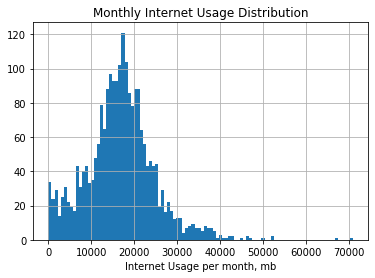

In [37]:
#print out general info for internet usage
print(data_monthly['mb_used'].describe())
print()
print('The mean for internet usage:', data_monthly['mb_used'].mean())
print('The median for internet usage:', data_monthly['mb_used'].median())
print('The variance for internet usage:', np.var(data_monthly['mb_used']))
print('The standard deviation for internet usage:', np.std(data_monthly['mb_used']))
data_monthly['mb_used'].hist(bins=100)
plt.title("Monthly Internet Usage Distribution")
plt.xlabel("Internet Usage per month, mb")
plt.show()

What about the internet usage? On average, users spend almost 17000 mb per month, which means that surf tariff users are very likely to exceed their limit of 15360. On histogram we see significant drop after 30000 which means that although there are people who use more, the number of these people isn't that big.

<a id="part3_2"></a>
#### Differences in customer behavior of Surf/Ultimate plan users

In [39]:
#querying only surf plan users
surf_users = data_monthly.query('plan == "surf"').copy()
surf_users.sample(5)

,user_id,month,calls,duration,messages,mb_used,city,plan,churn_month,profit
2097,1461,12,43.0,275.16,0.0,11126.94,"Pittsburgh, PA MSA",surf,0.0,20.0000
2151,1474,9,34.0,248.74,30.0,23424.65,"Bakersfield, CA MSA",surf,0.0,100.0000
2207,1489,12,55.0,370.59,86.0,15321.07,"Detroit-Warren-Dearborn, MI MSA",surf,0.0,21.0800
827,1176,11,73.0,516.76,64.0,28528.76,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,0.0,150.9228
1198,1258,12,16.0,125.17,49.0,24029.00,"Chicago-Naperville-Elgin, IL-IN-WI MSA",surf,0.0,110.0000


In [40]:
#querying only ultimate plan users
ultimate_users = data_monthly.query('plan == "ultimate"').copy()
ultimate_users.sample(5)

,user_id,month,calls,duration,messages,mb_used,city,plan,churn_month,profit
153,1041,10,65.0,424.69,0.0,19097.12,"Las Vegas-Henderson-Paradise, NV MSA",ultimate,0.0,70.0
1730,1380,12,84.0,539.92,42.0,23857.53,"San Jose-Sunnyvale-Santa Clara, CA MSA",ultimate,0.0,70.0
1749,1384,10,43.0,351.07,83.0,25108.70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",ultimate,0.0,70.0
209,1050,7,63.0,403.42,0.0,16132.82,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",ultimate,10.0,70.0
417,1088,9,31.0,195.71,57.0,15253.79,"Phoenix-Mesa-Chandler, AZ MSA",ultimate,0.0,70.0


Calls duration for surf users:
count    1548.000000
mean      404.815581
std       222.396099
min         0.000000
25%       255.097500
50%       401.520000
75%       543.847500
max      1431.220000
Name: duration, dtype: float64

Calls duration for ultimate users:
count     708.000000
mean      405.914477
std       227.697201
min         0.000000
25%       244.362500
50%       399.095000
75%       532.227500
max      1292.090000
Name: duration, dtype: float64

The mean for calls for surf users: 404.81558139534883
The mean for calls for ultimate users: 405.91447740112994

The median for calls for surf users: 401.52
The median for calls for ultimate users: 399.09499999999997

The variance for calls for surf users: 49428.074117168435
The variance for calls for ultimate users: 51772.78651370994

The standard deviation for calls for surf users: 222.32425445094478
The standard deviation for calls for ultimate users: 227.5363410835947


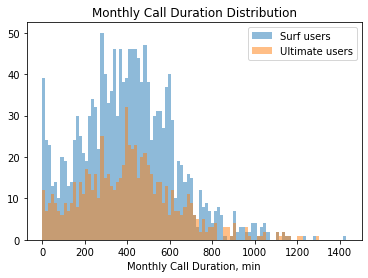

In [45]:
#print out general info for calls duration
print('Calls duration for surf users:')
print(surf_users['duration'].describe())
print()
print('Calls duration for ultimate users:')
print(ultimate_users['duration'].describe())
print()
print('The mean for calls for surf users:', surf_users['duration'].mean())
print('The mean for calls for ultimate users:', ultimate_users['duration'].mean())
print()
print('The median for calls for surf users:', surf_users['duration'].median())
print('The median for calls for ultimate users:', ultimate_users['duration'].median())
print()
print('The variance for calls for surf users:', np.var(surf_users['duration']))
print('The variance for calls for ultimate users:', np.var(ultimate_users['duration']))
print()
print('The standard deviation for calls for surf users:', np.std(surf_users['duration']))
print('The standard deviation for calls for ultimate users:', np.std(ultimate_users['duration']))

bins = np.linspace(data_monthly['duration'].min(), data_monthly['duration'].max(), 100)

plt.hist(surf_users['duration'], bins, alpha=0.5, label='Surf users')
plt.hist(ultimate_users['duration'], bins, alpha=0.5, label='Ultimate users')
plt.legend(loc='upper right')
plt.title("Monthly Call Duration Distribution")
plt.xlabel("Monthly Call Duration, min")
plt.show()

As for calls duration, for both histograms there's a peak around 400 minutes. Surf users histogram has a drop after 600 minutes, while Ultimate users histogram has a drop after 800. We also see that in a range of 0-800 minutes, histogram for Surf users is skewed to the left, while on histogram for Ultimate users it's skewed to the right.

Messages for surf users:
count    1548.000000
mean       31.111757
std        33.641112
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages, dtype: float64

Messages for ultimate users:
count    708.000000
mean      37.798023
std       34.896049
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: messages, dtype: float64

The mean for messages for surf users: 31.111757105943152
The mean for messages for ultimate users: 37.798022598870055

The median for messages for surf users: 24.0
The median for messages for ultimate users: 30.0

The variance for messages for surf users: 1130.9933243027597
The variance for messages for ultimate users: 1216.0142898751956

The standard deviation for messages for surf users: 33.63024419035282
The standard deviation for messages for ultimate users: 34.87139644286124


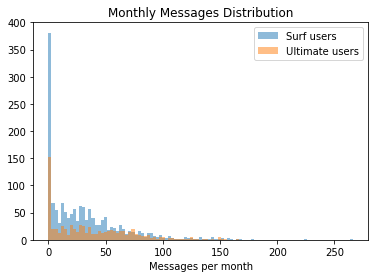

In [46]:
#print out general info for messages usage

print('Messages for surf users:')
print(surf_users['messages'].describe())
print()
print('Messages for ultimate users:')
print(ultimate_users['messages'].describe())
print()
print('The mean for messages for surf users:', surf_users['messages'].mean())
print('The mean for messages for ultimate users:', ultimate_users['messages'].mean())
print()
print('The median for messages for surf users:', surf_users['messages'].median())
print('The median for messages for ultimate users:', ultimate_users['messages'].median())
print()
print('The variance for messages for surf users:', np.var(surf_users['messages']))
print('The variance for messages for ultimate users:', np.var(ultimate_users['messages']))
print()
print('The standard deviation for messages for surf users:', np.std(surf_users['messages']))
print('The standard deviation for messages for ultimate users:', np.std(ultimate_users['messages']))

bins = np.linspace(data_monthly['messages'].min(), data_monthly['messages'].max(), 100)

plt.hist(surf_users['messages'], bins, alpha=0.5, label='Surf users')
plt.hist(ultimate_users['messages'], bins, alpha=0.5, label='Ultimate users')
plt.legend(loc='upper right')
plt.title("Monthly Messages Distribution")
plt.xlabel("Messages per month")
plt.show()

When we look at the messages histogram, we see that there are a lot of people who don't send messages at all, there's a peak at zero in both histograms. On the Surf users histogram we see that mostly users send up to 50 messages, less send up to 100, then there's a drop and almost no one sends more than 150 messages. On Ultimate users histogram we see pertty much the same height in a range 0-75 messages, then drop after 100 messages. Actually, max value according to the data sample we have is higher for Surf users (266) than it is for Ultimate users (166)

Internet usage for surf users:
count     1548.000000
mean     16560.312513
std       8006.513662
min          0.000000
25%      12040.765000
50%      16831.365000
75%      20992.482500
max      70931.590000
Name: mb_used, dtype: float64

Internet usage for ultimate users:
count      708.000000
mean     17242.419379
std       7883.455719
min          0.000000
25%      12671.450000
50%      16858.340000
75%      21096.085000
max      46595.330000
Name: mb_used, dtype: float64

The mean for internet usage for surf users: 16560.312512919896
The mean for internet usage for ultimate users: 17242.41937853107

The median for internet usage for surf users: 16831.364999999998
The median for internet usage for ultimate users: 16858.34

The variance for internet usage for surf users: 64062850.00093122
The variance for internet usage for ultimate users: 62061093.17720075

The standard deviation for internet usage for surf users: 8003.927161146034
The standard deviation for internet usage for ultima

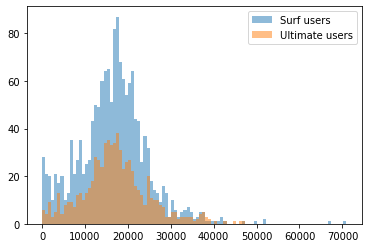

In [47]:
#print out general info for internet users

print('Internet usage for surf users:')
print(surf_users['mb_used'].describe())
print()
print('Internet usage for ultimate users:')
print(ultimate_users['mb_used'].describe())
print()
print('The mean for internet usage for surf users:', surf_users['mb_used'].mean())
print('The mean for internet usage for ultimate users:', ultimate_users['mb_used'].mean())
print()
print('The median for internet usage for surf users:', surf_users['mb_used'].median())
print('The median for internet usage for ultimate users:', ultimate_users['mb_used'].median())
print()
print('The variance for internet usage for surf users:', np.var(surf_users['mb_used']))
print('The variance for internet usage for ultimate users:', np.var(ultimate_users['mb_used']))
print()
print('The standard deviation for internet usage for surf users:', np.std(surf_users['mb_used']))
print('The standard deviation for internet usage for ultimate users:', np.std(ultimate_users['mb_used']))

bins = np.linspace(data_monthly['mb_used'].min(), data_monthly['mb_used'].max(), 100)

plt.hist(surf_users['mb_used'], bins, alpha=0.5, label='Surf users')
plt.hist(ultimate_users['mb_used'], bins, alpha=0.5, label='Ultimate users')
plt.legend(loc='upper right')
plt.show()

What about internet usage? Although on both histograms we can see a peak around 17000 mb, we see that on Surf users histogram there's a drop after 25 000 mb, while on Ultimate users histogram there's a drop after 30 000 mb. As for max values - actually Ultimate users use up to 40 000 mb max, while max value for Surf users is much higher - around 70 000 mb.

After studying these graphs we come to overall conclusion, that Surf plan users require on average 429 minutes, 31 messages and 16638 mb per month, while Ultimate plan users require on average 430 minutes, 38 messages and 17319 mb per month.

### Test the hypotheses:

<a id="part4_1"></a>
#### The average revenue from users of Ultimate and Surf calling plans differs

In [48]:
#print out general info about profit
surf_profit = surf_users['profit']
ultimate_profit = ultimate_users['profit']
print('Surf users profit:')
print(surf_profit.describe())
print()
print('Average profit from surf users:', surf_profit.mean())
print('Variance for surf users profit:', np.var(surf_profit))
print()
print('Ultimate users profit:')
print(ultimate_profit.describe())
print()
print('Average profit from ultimate users:', ultimate_profit.mean())
print('Variance for ultimate users profit:', np.var(ultimate_profit))

Surf users profit:
count    1548.000000
mean       60.271653
std        55.227070
min        20.000000
25%        20.000000
50%        40.255000
75%        80.000000
max       588.637200
Name: profit, dtype: float64

Average profit from surf users: 60.2716531007752
Variance for surf users profit: 3048.058947358782

Ultimate users profit:
count    708.000000
mean      72.353107
std       11.487385
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: profit, dtype: float64

Average profit from ultimate users: 72.35310734463278
Variance for ultimate users profit: 131.77362028791214


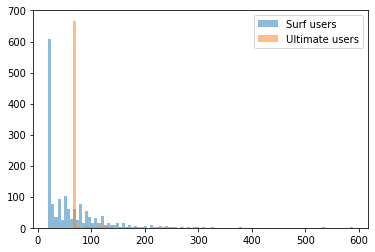

Overall profit from Surf users: 93300.519
Overall profit from Ultimate users: 51226.0

Percentage of Surf users: 68.6%
Percentage of Ultimate users: 31.4%


In [49]:
#visualizing monthly profit
bins = np.linspace(data_monthly['profit'].min(), data_monthly['profit'].max(), 100)

plt.hist(surf_users['profit'], bins, alpha=0.5, label='Surf users')
plt.hist(ultimate_users['profit'], bins, alpha=0.5, label='Ultimate users')
plt.legend(loc='upper right')
plt.show()

print('Overall profit from Surf users:', surf_users['profit'].sum())
print('Overall profit from Ultimate users:', ultimate_users['profit'].sum())
print()
print('Percentage of Surf users:', "{:.1%}".format(len(surf_users) / len(data_monthly)))
print('Percentage of Ultimate users:', "{:.1%}".format(len(ultimate_users) / len(data_monthly)))

In [50]:
#detecting the outliers

surf_desc = surf_profit.describe()
print(surf_desc)
print()
print('Outer upper fence for profit from Surf users:', (surf_desc['75%'] - surf_desc['25%']) + surf_desc['75%'] * 3)
print()
ulti_desc = ultimate_profit.describe()
print(ulti_desc)
print()
print('Outer upper fence for profit from Ultimate users:', (ulti_desc['75%'] - ulti_desc['25%']) + ulti_desc['75%'] * 3)

count    1548.000000
mean       60.271653
std        55.227070
min        20.000000
25%        20.000000
50%        40.255000
75%        80.000000
max       588.637200
Name: profit, dtype: float64

Outer upper fence for profit from Surf users: 300.0

count    708.000000
mean      72.353107
std       11.487385
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: profit, dtype: float64

Outer upper fence for profit from Ultimate users: 210.0


In [51]:
# creating a dataset free from outliers

surf_profit_checked = surf_users.query('profit <= 300.6')['profit'] #how can I use a variable here instead of number? Did not suceed to make a query where profit would be less than variable i declared before.
ultimate_profit_checked = ultimate_users.query('profit <= 210')['profit']

In [52]:
alpha = 0.05

results1 = st.ttest_ind(surf_profit_checked, ultimate_profit_checked, equal_var=False) #run the t-test for two statistical populations whith different variances


print('p-value:', results1.pvalue)
if (results1.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 4.267370937175115e-24
We reject the null hypothesis


From the graph of profits from users of both plans, we see that overall sum of profits from Surf plan users is significantly greater than that of Ultimate plan users, because there are more of them (68.6% Surf users vs 31.4% Ultimate users)

Let's check if average profit from users of different plan differs. The null hypothesis will sound like "The average profit from users of Ultimate and Surf plans is the same". Alternative hypothesis will sound like "The average profit from users of Ultimate and Surf plans differs". We set significance level to 0.05 as we did in the examples we've studied.

After running the statistical test we see that the data provided sufficient evidence, given the significance level we selected, to reject the null hypothesis. Therefore, we can conclude that average profit differs for users of disserent plans. If we look at the numbers provided by the sample we have, we see that average profit from Surf plan users is 60.5 dollars while average profit from Ultimate plan users is 72.3 dollars.

<a id="part4_2"></a>
#### The average revenue from users in NY-NJ area is different from that of the users from other regions

In [53]:
data_monthly['city'].value_counts() #check to see the name of the area

New York-Newark-Jersey City, NY-NJ-PA MSA          371
Los Angeles-Long Beach-Anaheim, CA MSA             129
Chicago-Naperville-Elgin, IL-IN-WI MSA              93
Dallas-Fort Worth-Arlington, TX MSA                 88
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Oxnard-Thousand Oaks-Ventura, CA MSA                 4
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 72, dtype: int64

In [55]:
#querying only users from NY-NJ and checking general info
nynj_users = data_monthly.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
print(nynj_users.head())
print()
print('Percentage of surf users in NY-NJ:', "{:.1%}".format(len(nynj_users.query('plan == "surf"')) / len(nynj_users)))
print('Percentage of ultimate users in NY-NJ:', "{:.1%}".format(len(nynj_users.query('plan == "ultimate"')) / len(nynj_users)))

    user_id  month  calls  duration  messages   mb_used  \
56     1014     11   28.0    149.33       9.0   1175.59   
57     1014     12  150.0   1050.62      64.0   7792.41   
75     1022      5   39.0    287.34       0.0   4908.08   
76     1022      6   76.0    455.45       0.0  23436.48   
77     1022      7   70.0    448.25       0.0   9933.15   

                                         city  plan  churn_month    profit  
56  New York-Newark-Jersey City, NY-NJ-PA MSA  surf          0.0   20.0000  
57  New York-Newark-Jersey City, NY-NJ-PA MSA  surf          0.0   36.9386  
75  New York-Newark-Jersey City, NY-NJ-PA MSA  surf          9.0   20.0000  
76  New York-Newark-Jersey City, NY-NJ-PA MSA  surf          9.0  100.0000  
77  New York-Newark-Jersey City, NY-NJ-PA MSA  surf          9.0   20.0000  

Percentage of surf users in NY-NJ: 82.5%
Percentage of ultimate users in NY-NJ: 17.5%


In [56]:
#querying only users not from NY-NJ and checking general info
rest_users = data_monthly.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA "')
print(rest_users.head())
print()
print('Percentage of surf users in other regions:', "{:.1%}".format(len(rest_users.query('plan == "surf"')) / len(rest_users)))
print('Percentage of ultimate users in other regions:', "{:.1%}".format(len(rest_users.query('plan == "ultimate"')) / len(rest_users)))

   user_id  month  calls  duration  messages   mb_used  \
0     1000     12   16.0    116.83      11.0   1901.47   
1     1001      8   27.0    171.14      30.0   6919.15   
2     1001      9   49.0    297.69      44.0  13314.82   
3     1001     10   65.0    374.11      53.0  22330.49   
4     1001     11   64.0    404.59      36.0  18504.30   

                                    city      plan  churn_month  profit  
0  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate          0.0   70.00  
1        Seattle-Tacoma-Bellevue, WA MSA      surf          0.0   20.00  
2        Seattle-Tacoma-Bellevue, WA MSA      surf          0.0   20.00  
3        Seattle-Tacoma-Bellevue, WA MSA      surf          0.0   90.09  
4        Seattle-Tacoma-Bellevue, WA MSA      surf          0.0   60.00  

Percentage of surf users in other regions: 68.6%
Percentage of ultimate users in other regions: 31.4%


In [57]:
#comparing profit from NY-NJ/Rest of users
nynj_profit = nynj_users['profit']
rest_profit = rest_users['profit']

print('Profit from users from NY-NJ area:')
print(nynj_profit.describe())
print()
print('Average profit from users of NY-NJ area:', nynj_profit.mean())
print('Variance for NY-NJ users profit:', np.var(nynj_profit))
print()
print('Profit from users from other regions:')
print(rest_profit.describe())
print()
print('Average profit from users from other regions:', rest_profit.mean())
print('Variance of profit from users from other regions:', np.var(rest_profit))

Profit from users from NY-NJ area:
count    371.000000
mean      59.617789
std       43.706569
min       20.000000
25%       20.000000
50%       50.588600
75%       71.366350
max      280.000000
Name: profit, dtype: float64

Average profit from users of NY-NJ area: 59.61778867924528
Variance for NY-NJ users profit: 1905.115193324023

Profit from users from other regions:
count    2256.000000
mean       64.063173
std        46.532064
min        20.000000
25%        22.537700
50%        70.000000
75%        70.000000
max       588.637200
Name: profit, dtype: float64

Average profit from users from other regions: 64.06317331560282
Variance of profit from users from other regions: 2164.2731961010254


In [58]:
#detecting the outliers

nynj_desc = nynj_profit.describe()
print(nynj_desc)
print()
print('Outer upper fence for profit from users from NY-NJ:', (nynj_desc['75%'] - nynj_desc['25%']) + nynj_desc['75%'] * 3)
print()
rest_desc = rest_profit.describe()
print(rest_desc)
print()
print('Outer upper fence for profit from users from other regions:', (rest_desc['75%'] - rest_desc['25%']) + rest_desc['75%'] * 3)

count    371.000000
mean      59.617789
std       43.706569
min       20.000000
25%       20.000000
50%       50.588600
75%       71.366350
max      280.000000
Name: profit, dtype: float64

Outer upper fence for profit from users from NY-NJ: 265.4654

count    2256.000000
mean       64.063173
std        46.532064
min        20.000000
25%        22.537700
50%        70.000000
75%        70.000000
max       588.637200
Name: profit, dtype: float64

Outer upper fence for profit from users from other regions: 257.4623


In [59]:
# creating a dataset free from outliers

nynj_profit_checked = nynj_users.query('profit <= 269.24')['profit']
rest_profit_checked = rest_users.query('profit <= 210')['profit']

In [60]:
alpha = 0.05

results2 = st.ttest_ind(nynj_profit_checked, rest_profit_checked, equal_var=False) #run the t-test for two statistical populations whith different variances

print('p-value:', results2.pvalue)
if (results1.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.5381980048853159
We reject the null hypothesis


Let's check if average profit from users from NY-NJ area differs from that of users from other regions. Null hypothesis will sound like "The average profit from users from NY-NJ area is equal to that of users from other regions". Alternative hypothesis will sound like "The average profit from users from NY-NJ region differs from that of users from other regions". We set significance level to 0.05 like in the examples we've studied.

After running the statistical test we see that the data provided sufficient evidence, given the significance level we selected, to reject the null hypothesis. Therefore, we can conclude that the average profit from users from NY-NJ area differs from that of users from other regions. Looking at the numbers of users of different tariff plans, we see that 82% of NY-NJ users use Surf tariff plan, when in other regions the percentage is lower - about 68%. That can explain why the average profit from users from NY-NJ area is 59.8 which islower than that of users from other regions(64.3).

<a id="part5"></a>
### Overall conclusion

We saw that the customer's behaviour is not that different for both plans, although Ultimate users tend to spend a little bit more minutes, texts and internet than Surf users. We also see that because Surf limits are much lower than Ultimate's limits, Surf users are highly likely to exceed their limits and in average they spend much more money than just cost of pre-paid plan, while Ultimate users seem to almost never exceed their limits. Obviously, there are also more of the Surf users (68.6% in our sample), since the cost of the Surf package is much lower than the cost of Ultimate package.

With everything said, we see that Ultimate plan on average is more profitable for the Megaline company than the Surf plan. We can see evidence when comparing different regions: the higher the percentage of Surf users, the lower the average profit. I would recommend to ajust advertising budget according to this conclusion.